/mnt/batch/tasks/shared/LS_root/mounts/clusters/el203/code/Users/el20/DL/ch06
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el203/code/Users/el20/DL
train loss:2.2980665821042674
=== epoch:1, train acc:0.302, test acc:0.272 ===
train loss:2.2965148552005936
train loss:2.291149943282121
train loss:2.2862006662433476
train loss:2.2748142570753322
train loss:2.258286499049776
train loss:2.2495894731366612
train loss:2.2276686173930544
train loss:2.2175713807091997
train loss:2.1639392441918828
train loss:2.143676581185374
train loss:2.090284929456411
train loss:2.1039062856821538
train loss:1.9890633910859352
train loss:1.8601021740159716
train loss:1.9014642962831831
train loss:1.7906377686497077
train loss:1.7585965270955277
train loss:1.6624946529375348
train loss:1.6033177387579898
train loss:1.6284897970426644
train loss:1.4312230712593237
train loss:1.4299094576559772
train loss:1.2879250450047923
train loss:1.1442188434872558
train loss:1.124827877740222
train loss:1.067016534730

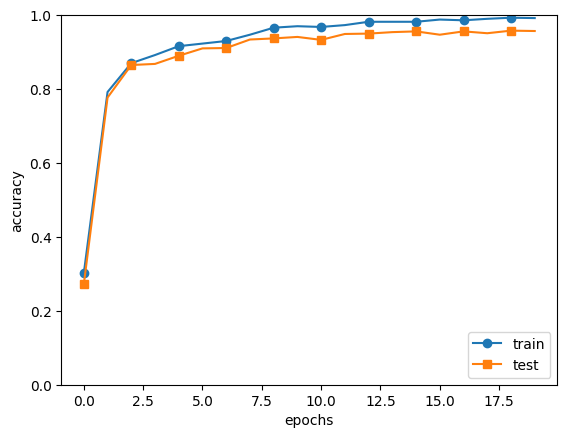

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
